- Dataset Link:https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus?select=ner_dataset.csv
- Reference Article:https://towardsdatascience.com/named-entity-recognition-and-classification-with-scikit-learn-f05372f07ba2

### Importing Necessary Library 

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import spacy
import nltk 

import zipfile

In [14]:
ner =pd.read_csv(r"C:\Users\hornt\Documents\03.PROJECTS -\01. Datasets\P13.0ner_dataset.csv",encoding ='ISO-8859-1')
print(ner.shape)
ner.head()

(1048575, 4)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [15]:
ner.isnull().sum()

Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

In [16]:
ner =ner.fillna(method='ffill')
print([ner['Word'].nunique(),ner['POS'].nunique(),ner['Tag'].nunique()])
ner.head()

[35177, 42, 17]


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


- ENTITIES LIST
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [18]:
pd.DataFrame(ner['Tag'].value_counts())

,count
Tag,
O,887908
B-geo,37644
B-tim,20333
B-org,20143
I-per,17251
B-per,16990
I-org,16784
B-gpe,15870
I-geo,7414


In [58]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix

In [47]:
X_train, X_test, y_train, y_test = train_test_split(ner.Word, ner.Tag, test_size = 0.33, random_state=0,stratify =ner.Tag)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(702545,) (346030,) (702545,) (346030,)


In [48]:
v =TfidfVectorizer()
X_train_cv =v.fit_transform(X_train)
X_test_cv = v.transform(X_test)
print(X_train_cv.shape,X_test_cv.shape)

(702545, 23866) (346030, 23866)


In [42]:
print(v.vocabulary_)

{'sunday': 20873, 'that': 21493, 'he': 9933, 'countries': 5421, 'end': 7419, 'the': 21498, 'are': 1933, 'superdome': 20892, 'such': 20782, 'for': 8600, 'indexes': 10787, 'all': 1444, 'less': 12565, 'soldiers': 20017, 'staunchest': 20461, 'well': 23247, 'reactor': 17424, 'violence': 22905, 'with': 23412, 'says': 18916, 'cuba': 5616, 'goals': 9237, 'higher': 10109, 'ethiopian': 7697, 'progress': 16794, 'incentives': 10729, 'killed': 12002, 'new': 14711, 'obtained': 15075, 'last': 12371, 'in': 10701, 'resources': 18048, 'yet': 23637, 'nine': 14804, 'say': 18910, 'again': 1207, 'day': 5847, 'temperatures': 21386, 'of': 15118, 'lebanon': 12481, 'bin': 3089, 'severe': 19297, 'hawk': 9918, 'who': 23312, 'victims': 22839, 'force': 8607, 'vote': 22987, 'aircraft': 1301, 'trying': 22090, 'deal': 5872, 'trading': 21883, 'and': 1630, 'room': 18447, 'week': 23223, 'to': 21700, 'court': 5440, 'long': 12829, 'from': 8812, 'killing': 12004, 'prospects': 16869, 'concerns': 4972, 'ray': 17399, 'travelin

### Logistic Regression Model

In [59]:
model =LogisticRegression()
model.fit(X_train_cv,y_train)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00       133
       B-eve       0.62      0.24      0.34       102
       B-geo       0.78      0.69      0.73     12422
       B-gpe       0.93      0.90      0.91      5237
       B-nat       0.36      0.23      0.28        66
       B-org       0.75      0.34      0.47      6647
       B-per       0.76      0.54      0.63      5607
       B-tim       0.87      0.73      0.79      6710
       I-art       0.00      0.00      0.00        98
       I-eve       0.00      0.00      0.00        83
       I-geo       0.67      0.48      0.56      2447
       I-gpe       0.50      0.40      0.44        65
       I-nat       0.00      0.00      0.00        17
       I-org       0.58      0.21      0.30      5539
       I-per       0.77      0.50      0.60      5693
       I-tim       0.59      0.04      0.08      2154
           O       0.94      0.99      0.97    293010

    accuracy              

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyper Parameter Tuned - Multinomial Naives Bayes

In [53]:
params =  {'alpha':[0.001,0.01,0.1,0.25,0.3,0.35,0.5,0.6,0.7,0.8,0.9,1,2,5]}
model = GridSearchCV(MultinomialNB(),param_grid=params,cv=3,scoring='accuracy')
model.fit(X_train_cv,y_train)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.33      0.06      0.10       133
       B-eve       0.57      0.25      0.34       102
       B-geo       0.77      0.76      0.76     12422
       B-gpe       0.93      0.94      0.93      5237
       B-nat       0.61      0.17      0.26        66
       B-org       0.71      0.40      0.51      6647
       B-per       0.70      0.66      0.68      5607
       B-tim       0.87      0.75      0.81      6710
       I-art       0.00      0.00      0.00        98
       I-eve       0.22      0.02      0.04        83
       I-geo       0.69      0.49      0.57      2447
       I-gpe       1.00      0.06      0.12        65
       I-nat       0.00      0.00      0.00        17
       I-org       0.56      0.22      0.32      5539
       I-per       0.74      0.65      0.69      5693
       I-tim       0.56      0.08      0.14      2154
           O       0.96      0.99      0.97    293010

    accuracy              

C:\Users\hornt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


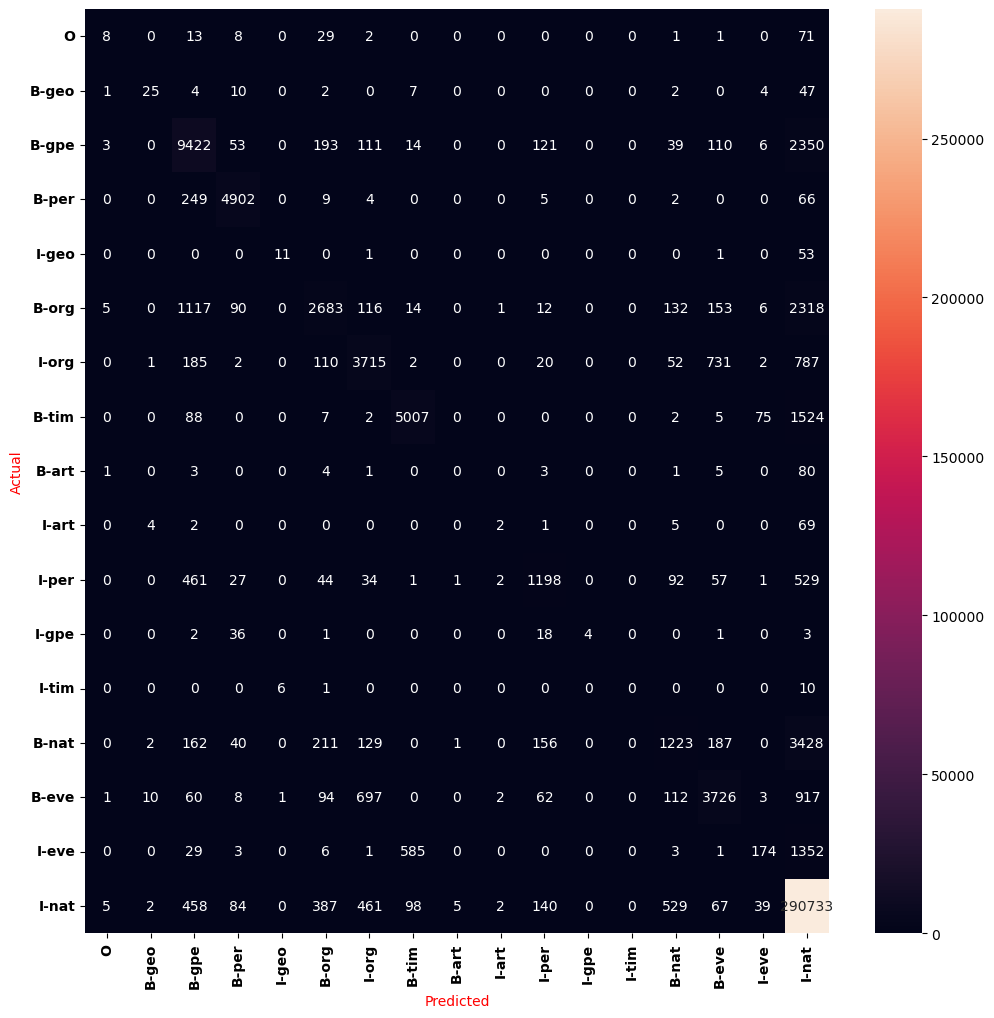

In [56]:
labels = list(ner.Tag.unique())
cm =pd.DataFrame(confusion_matrix(y_true =y_test,y_pred =y_pred))
fig,ax =plt.subplots(figsize =(12,12))
sns.heatmap(cm,annot =True ,fmt ='0.0f',ax =ax)
ax.set_xlabel('Predicted',color ='red',size =10)
ax.set_ylabel('Actual',color ='red',size =10)
ax.xaxis.set_ticklabels(labels,rotation =90,weight ='bold')
ax.yaxis.set_ticklabels(labels,rotation =0,weight ='bold')
plt.show()